<a href="https://colab.research.google.com/github/nsk20/CMPE257-Fall23-ShyamKumar-Nalluri/blob/homework-3/HW3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [39]:
import matplotlib.pyplot as plt
import numpy as np

def load_data(name):
    labels = []
    images = []
    with open(name, 'r') as f:
        for row in f:
            row = row.strip().split(' ')
            row=np.array(row).astype(float)
            #print(row.shape)

            label=row[0]
            image = row[1:]
            images.append(image)
            labels.append(label)
    return np.array(images), np.array(labels)

def featExtrct(name):

    images, labels = load_data(name)
    images = images.reshape(-1, 16, 16)
    #images = (images+1)/2 #mapping from 0 to 255

    indselect = (labels == 1) | (labels == 5)
    images = images[indselect]
    labels = labels[indselect]
    # Extract feature

    #intensity
    inten = images.reshape(-1, 16*16).mean(axis=-1)

    #symmetry

    symall=[]
    for i in range(len(images)):
        sym1 = np.abs(np.fliplr(images[i]) - images[i]) +np.abs(np.flipud(images[i]) - images[i])

        symall.append(sym1)
    symall=np.array(symall)
    print(symall.shape)
    sym=np.array(symall.reshape(len(images),-1).mean(axis=-1))
    print('sym shape')

    #plotting features
    i1 = (labels == 1)
    i5 = (labels == 5)
    labels = np.zeros(len(labels))
    labels[i1] = 1
    labels[i5] = -1

    featvector = np.concatenate((inten[:, None], sym[:, None]), axis=1)

    plt.figure()
    plt.scatter(inten[i1], sym[i1], c='b', marker='o', label='digit 1 feature')
    plt.scatter(inten[i5], sym[i5], c='r', marker='x', label='digit 5 feature')
    plt.legend()
    plt.xlabel('Intensity')
    plt.ylabel('Vertical Symmetry')
    plt.title('For the file named:'+name)
    plt.show()



    return featvector, labels

(1561, 16, 16)
sym shape


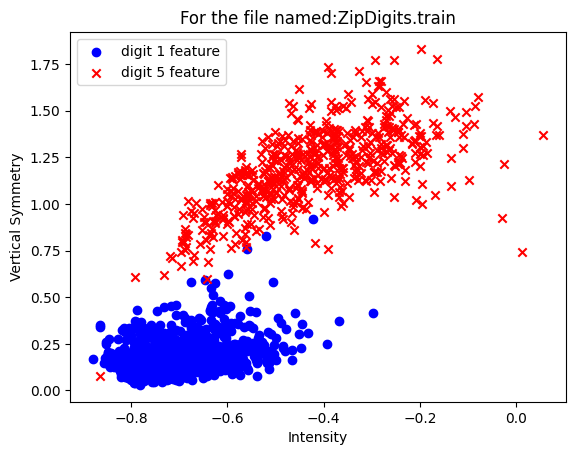

(424, 16, 16)
sym shape


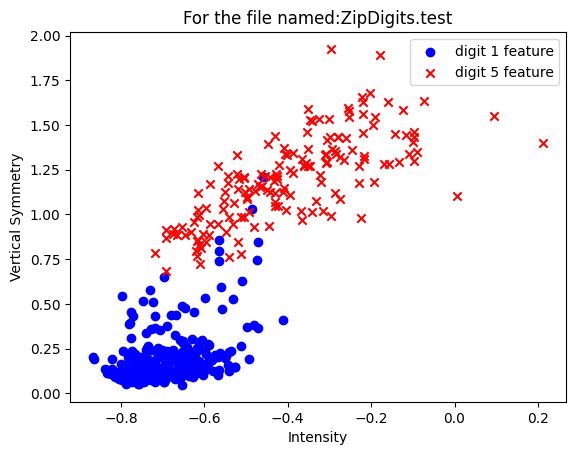

In [40]:
trainfile = 'ZipDigits.train'
testfile = 'ZipDigits.test'
#Data collect
traindata, trainlabel= featExtrct(trainfile)
testdata, testlabel=featExtrct(testfile)

#Padded with 1
trDataPadded = np.concatenate((np.ones((len(traindata), 1)), traindata), axis=1)
tsDataPadded= np.concatenate((np.ones((len(testdata), 1)), testdata), axis=1)

In [42]:
import numpy as np
import matplotlib.pyplot as plt

# Define the activation function (tanh) and its derivative
def tanh(x):
    return np.tanh(x)

def tanh_derivative(x):
    return 1 - np.tanh(x) ** 2

# Initialize weights and biases for a 2-layer neural network
def initialize_weights(input_size, hidden_size):
    W1 = np.random.randn(hidden_size, input_size)
    b1 = np.zeros((hidden_size, 1))
    W2 = np.random.randn(1, hidden_size)
    b2 = np.zeros((1, 1))
    return W1, b1, W2, b2

# Forward propagation
def forward_propagation(X, W1, b1, W2, b2):
    Z1 = np.dot(W1, X) + b1
    A1 = tanh(Z1)
    Z2 = np.dot(W2, A1) + b2
    A2 = tanh(Z2)
    return A1, A2

# Backpropagation
def backward_propagation(X, Y, A1, A2, W1, W2):
    m = X.shape[1]

    dZ2 = A2 - Y
    dW2 = (1 / m) * np.dot(dZ2, A1.T)
    db2 = (1 / m) * np.sum(dZ2, axis=1, keepdims=True)

    dZ1 = np.dot(W2.T, dZ2) * tanh_derivative(A1)
    dW1 = (1 / m) * np.dot(dZ1, X.T)
    db1 = (1 / m) * np.sum(dZ1, axis=1, keepdims=True)

    return dW1, db1, dW2, db2

# Gradient descent
def gradient_descent(X, Y, W1, b1, W2, b2, learning_rate, num_iterations):
    cost_history = []
    m = X.shape[1]

    for i in range(num_iterations):
        A1, A2 = forward_propagation(X, W1, b1, W2, b2)
        dW1, db1, dW2, db2 = backward_propagation(X, Y, A1, A2, W1, W2)

        # Update weights and biases
        W1 -= learning_rate * dW1
        b1 -= learning_rate * db1
        W2 -= learning_rate * dW2
        b2 -= learning_rate * db2

        # Calculate and record the cost (squared error)
        cost = (1 / (2 * m)) * np.sum((A2 - Y) ** 2)
        cost_history.append(cost)

    return W1, b1, W2, b2, cost_history

# Classification using sign function
def classify(X, W1, b1, W2, b2):
    _, A2 = forward_propagation(X, W1, b1, W2, b2)
    predictions = np.sign(A2)
    return predictions

# Main function for training and testing
def train_and_test_neural_network(X_train, Y_train, X_test, Y_test, num_iterations=2000000, learning_rate=0.1):
    input_size = X_train.shape[0]
    hidden_size = 30
    W1, b1, W2, b2 = initialize_weights(input_size, hidden_size)

    W1, b1, W2, b2, cost_history = gradient_descent(X_train, Y_train, W1, b1, W2, b2, learning_rate, num_iterations)

    # Plot Ein(w) vs. iteration number
    plt.figure()
    plt.plot(range(num_iterations), cost_history)
    plt.xlabel('Iteration Number')
    plt.ylabel('Ein(w)')
    plt.show()

    # Test the neural network on the test data
    test_predictions = classify(X_test, W1, b1, W2, b2)
    test_error = np.mean(test_predictions != Y_test)

    return test_error

# Load your dataset and preprocess it here
# X_train, Y_train, X_test, Y_test = load_and_preprocess_data()

# Example usage
# test_error = train_and_test_neural_network(X_train, Y_train, X_test, Y_test)
# print(f"Test Error: {test_error}")


In [43]:
import numpy as np

# Activation function
def tanh(x):
    return np.tanh(x)

# Derivative of tanh
def tanh_derivative(x):
    return 1.0 - np.tanh(x)**2

# Forward propagation
def forward_propagation(X, W1, b1, W2, b2):
    Z1 = np.dot(W1, X) + b1
    A1 = tanh(Z1)
    Z2 = np.dot(W2, A1) + b2
    A2 = tanh(Z2)
    return Z1, A1, Z2, A2

# Back propagation
def back_propagation(X, Y, Z1, A1, Z2, A2, W2):
    dZ2 = 2 * (A2 - Y) * tanh_derivative(Z2)
    dW2 = np.dot(dZ2, A1.T)
    db2 = np.sum(dZ2, axis=1, keepdims=True)
    dA1 = np.dot(W2.T, dZ2)
    dZ1 = dA1 * tanh_derivative(Z1)
    dW1 = np.dot(dZ1, X.T)
    db1 = np.sum(dZ1, axis=1, keepdims=True)
    return dW1, db1, dW2, db2

# Initialize the weights and biases
input_size = 2  # Number of input neurons
hidden_size = 4  # Number of hidden neurons
output_size = 1  # Number of output neurons
np.random.seed(1)
W1 = np.random.randn(hidden_size, input_size) * 0.01
b1 = np.zeros((hidden_size, 1))
W2 = np.random.randn(output_size, hidden_size) * 0.01
b2 = np.zeros((output_size, 1))

# Initialize input and output data
X = np.array([[0.1], [0.2]])  # Example input
Y = np.array([[1]])  # Example output

# Learning rate
learning_rate = 0.01

# Number of iterations for gradient descent
num_iterations = 1000

# Training process
for i in range(num_iterations):
    # Forward propagation
    Z1, A1, Z2, A2 = forward_propagation(X, W1, b1, W2, b2)

    # Compute cost (Mean Squared Error)
    cost = np.mean(np.square(A2 - Y))

    # Backward propagation
    dW1, db1, dW2, db2 = back_propagation(X, Y, Z1, A1, Z2, A2, W2)

    # Update weights and biases
    W1 -= learning_rate * dW1
    b1 -= learning_rate * db1
    W2 -= learning_rate * dW2
    b2 -= learning_rate * db2

    # Print the cost every 100 iterations
    if i % 100 == 0:
        print(f"Iteration {i} - Cost: {cost}")

# Print final parameters and cost
print("Final weights and biases:")
print("W1:", W1)
print("b1:", b1)
print("W2:", W2)
print("b2:", b2)
print("Final cost:", cost)


Iteration 0 - Cost: 1.0001025686108678
Iteration 100 - Cost: 0.10055795317619158
Iteration 200 - Cost: 0.04505231284730788
Iteration 300 - Cost: 0.028245748910724233
Iteration 400 - Cost: 0.02036576820679395
Iteration 500 - Cost: 0.01584485151309767
Iteration 600 - Cost: 0.01292954555494259
Iteration 700 - Cost: 0.010900479690994187
Iteration 800 - Cost: 0.009410186957517034
Iteration 900 - Cost: 0.008270991330680672
Final weights and biases:
W1: [[ 0.01702735 -0.00454977]
 [-0.00623912 -0.01264449]
 [ 0.01143203 -0.01745948]
 [ 0.01280069 -0.01690692]]
b1: [[ 0.00783898]
 [-0.00957401]
 [ 0.02777955]
 [-0.04647427]]
W2: [[ 0.00899343 -0.01239685  0.02853836 -0.05166162]]
b2: [[1.54865015]]
Final cost: 0.007380940187318278


In [44]:
import numpy as np

# Define sigmoid activation function
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

# Define derivative of sigmoid
def sigmoid_derivative(x):
    return sigmoid(x) * (1 - sigmoid(x))

# Initialize weights and biases
np.random.seed(42)
input_size = 2  # number of input neurons
hidden_size = 4  # number of hidden neurons
output_size = 1  # number of output neurons

# Weights and biases between input layer and hidden layer
W1 = np.random.randn(hidden_size, input_size)
b1 = np.zeros((hidden_size, 1))

# Weights and biases between hidden layer and output layer
W2 = np.random.randn(output_size, hidden_size)
b2 = np.zeros((output_size, 1))

# Learning rate
learning_rate = 0.01

# Number of iterations for training
iterations = 10000

# Stochastic gradient descent implementation
def train(X, Y, W1, b1, W2, b2, learning_rate, iterations):
    for i in range(iterations):
        # Forward propagation
        Z1 = np.dot(W1, X) + b1
        A1 = sigmoid(Z1)
        Z2 = np.dot(W2, A1) + b2
        A2 = sigmoid(Z2)
        # Compute cost
        cost = np.mean(np.square(A2 - Y))
        # Backward propagation
        dZ2 = (A2 - Y) * sigmoid_derivative(Z2)
        dW2 = np.dot(dZ2, A1.T)
        db2 = np.sum(dZ2, axis=1, keepdims=True)
        dA1 = np.dot(W2.T, dZ2)
        dZ1 = dA1 * sigmoid_derivative(Z1)
        dW1 = np.dot(dZ1, X.T)
        db1 = np.sum(dZ1, axis=1, keepdims=True)
        # Update parameters
        W1 -= learning_rate * dW1
        b1 -= learning_rate * db1
        W2 -= learning_rate * dW2
        b2 -= learning_rate * db2
        # Print cost every 1000 iterations
        if i % 1000 == 0:
            print(f"Iteration {i}, cost: {cost}")
    return W1, b1, W2, b2

# Example dataset (XOR problem)
X = np.array([[0, 0, 1, 1], [0, 1, 0, 1]])
Y = np.array([[0, 1, 1, 0]])

# Train the neural network
W1, b1, W2, b2 = train(X, Y, W1, b1, W2, b2, learning_rate, iterations)
# Return the final weights and biases for further inspection if necessary
W1, b1, W2, b2


Iteration 0, cost: 0.26054932638682504
Iteration 1000, cost: 0.24772609333776124
Iteration 2000, cost: 0.24616789435304043
Iteration 3000, cost: 0.2444117146506852
Iteration 4000, cost: 0.24235419604345804
Iteration 5000, cost: 0.23990143398905023
Iteration 6000, cost: 0.2369643871705256
Iteration 7000, cost: 0.23345699387898405
Iteration 8000, cost: 0.2293010445807469
Iteration 9000, cost: 0.22444078368709677


(array([[ 0.65076795,  0.04168385],
        [ 2.17869597,  2.360393  ],
        [-0.15850052, -0.01694998],
        [ 1.44820853,  0.48313201]]),
 array([[ 0.08541185],
        [-0.08888072],
        [ 0.03054351],
        [-0.10773274]]),
 array([[-0.82169186,  1.86565025, -0.59494949, -0.31908886]]),
 array([[-0.47708699]]))

In [47]:
def load_data(file_path):
    data = []
    with open(file_path, 'r') as file:
        for line in file:
            # Strip the line to remove leading/trailing whitespace and then split it into parts
            parts = line.strip().split()
            # Only add parts that have 257 elements (1 label + 256 features)
            if len(parts) == 257:
                data.append(parts)
            else:
                print(f"Skipping line due to incorrect number of elements: {line}")
    # Convert the list to a NumPy array
    data = np.array(data, dtype=float)
    labels = data[:, 0]
    features = data[:, 1:]
    return labels, features

# Ensure you use the correct path for the data file
train_data_path = 'ZipDigits.train'  # Update this path
train_labels, train_features = load_data(train_data_path)
train_labels, train_features = preprocess_data(train_labels, train_features)

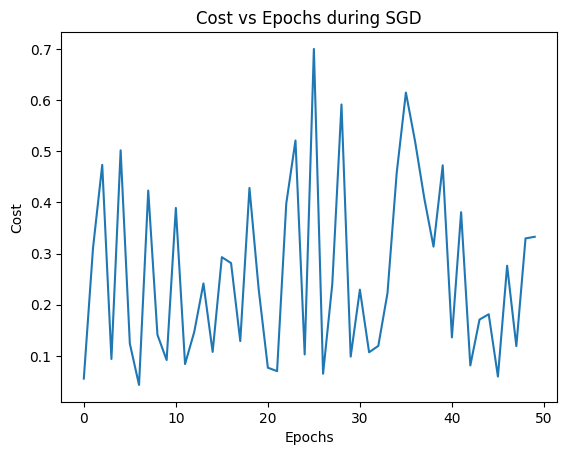

In [48]:
import numpy as np
import matplotlib.pyplot as plt

# Define the sigmoid activation function and its derivative
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
    return sigmoid(x) * (1 - sigmoid(x))

# Function to load data from a file
def load_data(file_path):
    data = []
    with open(file_path, 'r') as file:
        for line in file:
            # Strip the line to remove leading/trailing whitespace and then split it into parts
            parts = line.strip().split()
            # Only add parts that have 257 elements (1 label + 256 features)
            if len(parts) == 257:
                data.append(parts)
            else:
                print(f"Skipping line due to incorrect number of elements: {line}")
    # Convert the list to a NumPy array
    data = np.array(data, dtype=float)
    labels = data[:, 0]
    features = data[:, 1:]
    return labels, features

# Function to preprocess the data to only keep labels for digits 1 and 5
def preprocess_data(labels, features):
    indices = np.where((labels == 1.0) | (labels == 5.0))
    filtered_labels = labels[indices]
    filtered_features = features[indices]
    filtered_features /= 255.0  # Normalize features to be between 0 and 1
    binary_labels = (filtered_labels == 1.0).astype(float)  # Convert labels to binary
    return binary_labels, filtered_features

# Stochastic Gradient Descent function for training the neural network
def train_sgd(X, Y, W1, b1, W2, b2, learning_rate, epochs):
    m = X.shape[0]
    cost_history = []
    for i in range(epochs):
        # Shuffle the dataset at the beginning of each epoch
        permutation = np.random.permutation(m)
        X_shuffled = X[permutation]
        Y_shuffled = Y[permutation]
        for j in range(m):
            # Perform SGD using only one sample at a time
            x_sample = X_shuffled[j].reshape(-1, 1)
            y_sample = Y_shuffled[j].reshape(-1, 1)
            # Forward propagation
            Z1 = np.dot(W1, x_sample) + b1
            A1 = sigmoid(Z1)
            Z2 = np.dot(W2, A1) + b2
            A2 = sigmoid(Z2)
            # Compute cost
            cost = np.mean(np.square(A2 - y_sample))
            # Backward propagation
            dZ2 = (A2 - y_sample) * sigmoid_derivative(Z2)
            dW2 = np.dot(dZ2, A1.T)
            db2 = np.sum(dZ2, axis=1, keepdims=True)
            dA1 = np.dot(W2.T, dZ2)
            dZ1 = dA1 * sigmoid_derivative(Z1)
            dW1 = np.dot(dZ1, x_sample.T)
            db1 = np.sum(dZ1, axis=1, keepdims=True)
            # Update weights and biases
            W1 -= learning_rate * dW1
            b1 -= learning_rate * db1
            W2 -= learning_rate * dW2
            b2 -= learning_rate * db2
        # Record the cost at the end of each epoch
        cost_history.append(cost)
        # if i % 10 == 0:  # Print the cost every 10 epochs
        #     print(f"Epoch {i}: cost = {cost}")
    return W1, b1, W2, b2, cost_history

# Initialize neural network parameters
np.random.seed(42)
input_size = 256  # Number of features (pixels in an image)
hidden_size = 64  # Number of hidden layer neurons
output_size = 1   # Output layer size (1 neuron for binary classification)
W1 = np.random.randn(hidden_size, input_size) * 0.01
b1 = np.zeros((hidden_size, 1))
W2 = np.random.randn(output_size, hidden_size) * 0.01
b2 = np.zeros((output_size, 1))

# Specify learning rate and number of epochs
learning_rate = 0.1
epochs = 50  # Use a smaller number of epochs for a demonstration

# Load and preprocess training data
train_data_path = 'ZipDigits.train'  # Replace with your file path
train_labels, train_features = load_data(train_data_path)
train_labels, train_features = preprocess_data(train_labels, train_features)

# Train the neural network using SGD
W1, b1, W2, b2, cost_history = train_sgd(train_features, train_labels, W1, b1, W2, b2, learning_rate, epochs)

# Plot the cost history
plt.plot(cost_history)
plt.xlabel('Epochs')
plt.ylabel('Cost')
plt.title('Cost vs Epochs during SGD')
plt.show()


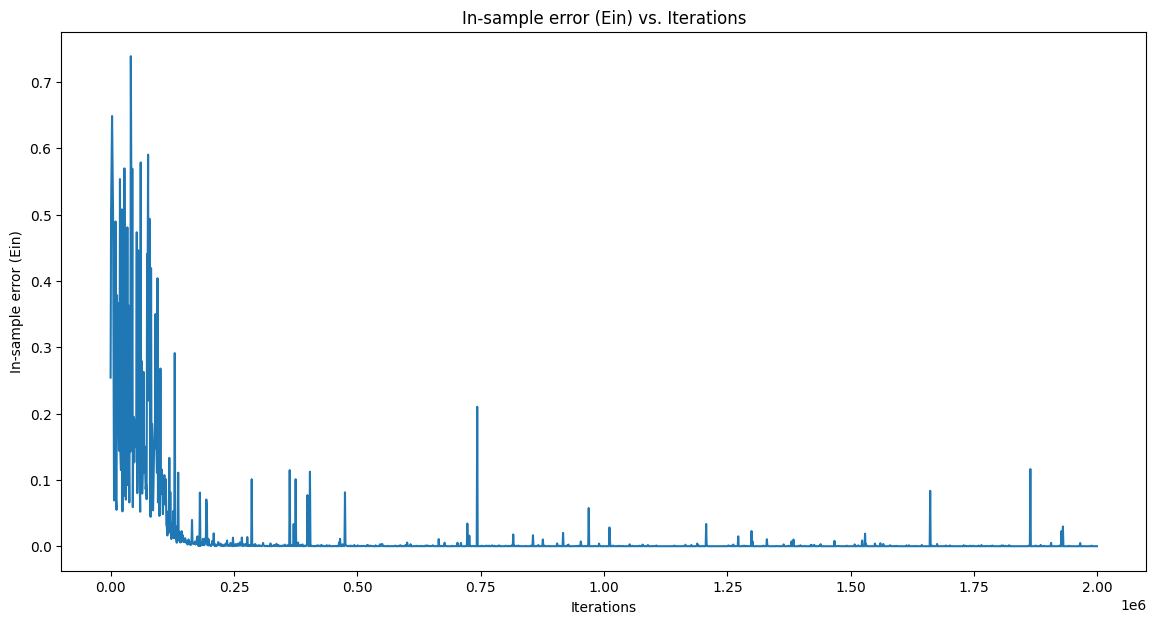

In [49]:
import numpy as np
import matplotlib.pyplot as plt

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
    return sigmoid(x) * (1 - sigmoid(x))

def load_data(file_path):
    data = []
    with open(file_path, 'r') as file:
        for line in file:
            parts = line.strip().split()
            if len(parts) == 257:  # Ensure each line has a label and 256 features
                data.append(parts)
    data = np.array(data, dtype=float)
    labels = data[:, 0]
    features = data[:, 1:]
    return labels, features

def preprocess_data(labels, features):
    indices = np.where((labels == 1.0) | (labels == 5.0))
    filtered_labels = labels[indices]
    filtered_features = features[indices]
    filtered_features /= 255.0  # Normalize features
    binary_labels = (filtered_labels == 1.0).astype(float)  # Convert labels to binary
    return binary_labels, filtered_features

def train_sgd(X, Y, W1, b1, W2, b2, learning_rate, iterations, record_every=1000):
    m = X.shape[0]
    cost_history = []

    for i in range(iterations):
        idx = np.random.randint(m)
        x_sample = X[idx].reshape(-1, 1)
        y_sample = Y[idx].reshape(-1, 1)

        Z1 = np.dot(W1, x_sample) + b1
        A1 = sigmoid(Z1)
        Z2 = np.dot(W2, A1) + b2
        A2 = sigmoid(Z2)

        dZ2 = (A2 - y_sample) * sigmoid_derivative(Z2)
        dW2 = np.dot(dZ2, A1.T)
        db2 = np.sum(dZ2, axis=1, keepdims=True)
        dA1 = np.dot(W2.T, dZ2)
        dZ1 = dA1 * sigmoid_derivative(Z1)
        dW1 = np.dot(dZ1, x_sample.T)
        db1 = np.sum(dZ1, axis=1, keepdims=True)

        W1 -= learning_rate * dW1
        b1 -= learning_rate * db1
        W2 -= learning_rate * dW2
        b2 -= learning_rate * db2

        if i % record_every == 0:
            cost = np.square(A2 - y_sample).mean()
            cost_history.append(cost)

    return W1, b1, W2, b2, cost_history

# Initialize network parameters
np.random.seed(42)
input_size = 256
hidden_size = 64
output_size = 1
W1 = np.random.randn(hidden_size, input_size) * 0.01
b1 = np.zeros((hidden_size, 1))
W2 = np.random.randn(output_size, hidden_size) * 0.01
b2 = np.zeros((output_size, 1))

# Specify learning rate and iterations
learning_rate = 0.1
iterations = 2 * 10**6  # 2 million iterations

# Load and preprocess training data
train_data_path = 'ZipDigits.train'
train_labels, train_features = load_data(train_data_path)
train_labels, train_features = preprocess_data(train_labels, train_features)

# Train the neural network using SGD
W1, b1, W2, b2, cost_history = train_sgd(train_features, train_labels, W1, b1, W2, b2, learning_rate, iterations)

# Plot the in-sample error (Ein) against iteration number
plt.figure(figsize=(14, 7))
plt.plot(range(0, iterations, 1000), cost_history)
plt.xlabel('Iterations')
plt.ylabel('In-sample error (Ein)')
plt.title('In-sample error (Ein) vs. Iterations')
plt.show()


In [50]:
import numpy as np

def predict(W1, b1, W2, b2, X):
    Z1 = np.dot(W1, X.T) + b1
    A1 = sigmoid(Z1)
    Z2 = np.dot(W2, A1) + b2
    A2 = sigmoid(Z2)
    predictions = np.where(A2 >= 0.5, 1, 0)  # Using 0.5 as the threshold
    return predictions.squeeze()

def calculate_error(predictions, labels):
    errors = predictions != labels
    return np.mean(errors)

# Load and preprocess test data
test_labels, test_features = load_data('ZipDigits.test')
test_labels, test_features = preprocess_data(test_labels, test_features)

# Predict on training and test data
train_predictions = predict(W1, b1, W2, b2, train_features)
test_predictions = predict(W1, b1, W2, b2, test_features)

# Calculate and print the in-sample error (Ein) and the test error
ein_error = calculate_error(train_predictions, train_labels)
test_error = calculate_error(test_predictions, test_labels)

print(f"In-sample error (Ein): {ein_error}")
print(f"Test error: {test_error}")

In-sample error (Ein): 0.0
Test error: 0.009433962264150943


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Sigmoid and its derivative
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
    return sigmoid(x) * (1 - sigmoid(x))

# Mini-batch gradient descent
def mini_batch_gradient_descent(X, Y, batch_size, W1, b1, W2, b2, learning_rate, iterations):
    cost_history = []
    m = X.shape[0]

    for i in range(iterations):
        permutation = np.random.permutation(m)
        X_shuffled = X[permutation]
        Y_shuffled = Y[permutation]

        for j in range(0, m, batch_size):
            X_batch = X_shuffled[j:j + batch_size].T
            Y_batch = Y_shuffled[j:j + batch_size].reshape(1, -1)
            # Forward propagation
            Z1 = np.dot(W1, X_batch) + b1
            A1 = sigmoid(Z1)
            Z2 = np.dot(W2, A1) + b2
            A2 = sigmoid(Z2)
            # Compute cost
            cost = np.mean(np.square(A2 - Y_batch))
            # Backward propagation
            dZ2 = (A2 - Y_batch) * sigmoid_derivative(Z2)
            dW2 = np.dot(dZ2, A1.T) / batch_size
            db2 = np.sum(dZ2, axis=1, keepdims=True) / batch_size
            dA1 = np.dot(W2.T, dZ2)
            dZ1 = dA1 * sigmoid_derivative(Z1)
            dW1 = np.dot(dZ1, X_batch.T) / batch_size
            db1 = np.sum(dZ1, axis=1, keepdims=True) / batch_size
            # Update parameters
            W1 -= learning_rate * dW1
            b1 -= learning_rate * db1
            W2 -= learning_rate * dW2
            b2 -= learning_rate * db2
        if i % 1000 == 0:
            cost_history.append(cost)
            print(f"Iteration {i}: cost = {cost}")

    return W1, b1, W2, b2, cost_history

# Set the seed for reproducibility
np.random.seed(42)

# Initialize neural network parameters
input_size = 256  # Input layer size (number of pixels in image)
hidden_size = 64  # Hidden layer size
output_size = 1   # Output layer size (binary classification)
W1 = np.random.randn(hidden_size, input_size) * 0.01
b1 = np.zeros((hidden_size, 1))
W2 = np.random.randn(output_size, hidden_size) * 0.01
b2 = np.zeros((output_size, 1))

# Load and preprocess training data
train_labels, train_features = load_data('ZipDigits.train')
train_labels, train_features = preprocess_data(train_labels, train_features)

# Load and preprocess test data
test_labels, test_features = load_data('ZipDigits.test')
test_labels, test_features = preprocess_data(test_labels, test_features)

# Train the neural network
learning_rate = 0.1
iterations = 2 * 10**6
batch_size = 32
W1, b1, W2, b2, cost_history = mini_batch_gradient_descent(
    train_features,
    train_labels,
    batch_size,
    W1, b1, W2, b2,
    learning_rate,
    iterations
)

# Predict on the training and test sets
train_predictions = predict(W1, b1, W2, b2, train_features)
test_predictions = predict(W1, b1, W2, b2, test_features)

# Calculate and report Ein and the test error
ein_error = calculate_error(train_predictions, train_labels)
test_error = calculate_error(test_predictions, test_labels)

print(f"In-sample error (Ein): {ein_error}")
print(f"Test error: {test_error}")

# Plot Ein vs iteration number
plt.plot(range(0, iterations, 1000), cost_history)
plt.xlabel('Iterations')
plt.ylabel('In-sample error (Ein)')
plt.title('In-sample error (Ein) vs. Iterations')
plt.show()

Iteration 0: cost = 0.19344226263644837
Iteration 1000: cost = 0.25571216398508406
Iteration 2000: cost = 0.08919198283494696
Iteration 3000: cost = 0.014560157291820116
Iteration 4000: cost = 0.020594155122509644
Iteration 5000: cost = 0.008281318974165343
Iteration 6000: cost = 0.0013855134779471542
Iteration 7000: cost = 0.0056781693823381675
Iteration 8000: cost = 0.0007330847257264254
Iteration 9000: cost = 0.0003970286530314614
Iteration 10000: cost = 0.0002773233734720151
Iteration 11000: cost = 0.0002442132540333329
Iteration 12000: cost = 0.001895739123780116
Iteration 13000: cost = 0.0003131643636983672
Iteration 14000: cost = 0.001365554675280922
Iteration 15000: cost = 0.0006490370908101265
Iteration 16000: cost = 0.000844585862660717
Iteration 17000: cost = 0.00034095802299845545
Iteration 18000: cost = 0.000194252910531266
Iteration 19000: cost = 0.0005643750412314581
Iteration 20000: cost = 0.0008918501595109136
Iteration 21000: cost = 0.000104534966394522
Iteration 2200